In [37]:
from numpy import float32, uint8, ceil
from numpy import array, zeros, arange, pad, concatenate, linspace
from numpy import sin, cos, pi, absolute, angle, outer, dot, min, max, log, log2, real, imag, std, sum, sqrt, exp, clip
from numpy import logical_or
from numpy import allclose, load
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from IPython.display import Audio
import random
import csv

nsamples = 2048

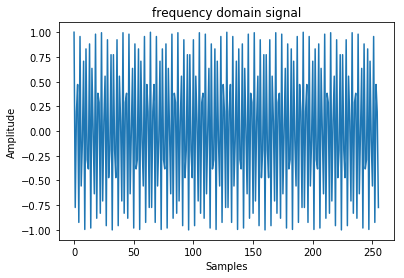

In [38]:
input_signal_real = []

with open('./real.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    input_signal_real, =[r for r in csvReader]
#     print(input_signal_real)
    
input_signal = zeros(len(input_signal_real))
                     
for i in range(0, len(input_signal_real)):
    input_signal[i] = float(input_signal_real[i]) 
    
#     x = input_signal_real[i].strip("NAN0000")
#     x = x.strip("-1.#Q")
#     if (x):
#         input_signal[i] = float(x) 
#     else: 
#         print("ERROR")
    
plt.plot(input_signal)
# plt.yscale('log')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('frequency domain signal')
plt.show()

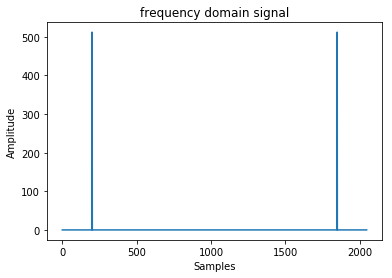

In [39]:
input_signal_real = []
input_signal_imag = []

with open('./complex.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    input_signal_real, input_signal_imag=[r for r in csvReader]
#     print(input_signal_real)
    
input_signal = zeros(len(input_signal_real), dtype=complex)

for i in range (0, len(input_signal_real)):
    x = input_signal_real[i]
    y = input_signal_imag[i]
    input_signal[i] = float(x) + 1j* float(y)
#     print(input_signal[i])
    
#     x = input_signal_real[i].strip("-1.#QO")
#     y = input_signal_imag[i].strip("-1.#QO")
#     x = x.strip("-1.#QNAN0")
#     y = y.strip("-1.#QNAN0")
#     if(x and y):
#         input_signal[i] = float(x) + 1j* float(y)
#     else:
#         input_signal[i] = 0
#         print('ERROR')
    
# # print(input_signal)
# plt.plot(real(input_signal))
# # plt.yscale('log')
# plt.xlabel('Samples')
# plt.ylabel('Amplitude')
# plt.title('frequency domain signal')
# plt.show()

# plt.plot(imag(input_signal))
# # plt.yscale('log')
# plt.xlabel('Samples')
# plt.ylabel('Amplitude')
# plt.title('frequency domain signal')
# plt.show()


plt.plot(sqrt(real(input_signal)**2 + imag(input_signal)**2))
# plt.yscale('log')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('frequency domain signal')
plt.show()

In [61]:
nsamples_array = []
DFT_time = []
FFT_time = []

with open('./performance.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    nsamples_array, DFT_time, FFT_time=[r for r in csvReader]
    

# t = arange(0.0, 2048.0)
# fft_time = zeros(2048)
# fft_time[63] = FFT_time[0]
# fft_time[127] = FFT_time[1]
# fft_time[255] = FFT_time[2]
# fft_time[511] = FFT_time[3]
# fft_time[1023] = FFT_time[4]
# fft_time[2047] = FFT_time[5]



# plt.plot(t, fft_time, label='FFT')
# # plt.plot(t, DFT_time, label='DFT')
# plt.xlabel('Number of samples')
# plt.ylabel('Time (s)')
# plt.title('Compare performance of FFT and DFT')
# plt.legend()
# plt.show()

# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# ax.scatter(nsamples_array, DFT_time, alpha=0.8, edgecolors='none', s=30)

# ax = fig.add_subplot(1, 1, 1)
# ax.scatter(nsamples_array, DFT_time, alpha=0.8, edgecolors='none', s=30)

# plt.title('Matplot scatter plot')
# plt.legend(loc=2)
# plt.show()

# import plotly.express as px
# fig = px.scatter(x=nsamples_array, y=DFT_time, labels={'x':'Number of samples', 'y':'Average computation time (ms)'})

# fig.show()

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=nsamples_array, y=DFT_time,
                    mode='lines',
                    name='DFT'))
fig.add_trace(go.Scatter(x=nsamples_array, y=FFT_time,
                    mode='lines+markers',
                    name='FFT'))

fig.update_layout(title='Performance Comparison between DFT and FFT over Different Sample Size',
                   xaxis_title='Number of samples',
                   yaxis_title='Average computation time (ms)')
fig.show()

def complexExp(x : float32):
    arg = 2 * pi * x 
    return cos(arg) + 1j * sin(arg)

In [14]:
def DFT(inSignal : complex, s : int = -1): 
    y = zeros(inSignal.shape, dtype=complex)
    
    # Hint 0: Use the complexExp function
    N = inSignal.size

    for x in range(0, N):
        for k in range(0, N):
            y[x] = y[x] + inSignal[k] * complexExp((s * k * x) / N )
    
    return y

In [15]:
def DFT_2(inSignal : complex, s : int = -1): 
    y = zeros(inSignal.shape, dtype=complex)
    
    # Hint 0: Use the complexExp function
    N = inSignal.size

    for x in range(0, N):
        for k in range(0, N):
            y[x] = y[x] + inSignal[k] * (cos(2 * pi * s * k * x / N) + 1j * sin(2 * pi * s * k * x / N))
    
    return y

In [16]:
def generate_signal():
    nperiod = 2
    sampling_time_rad = nperiod * 2 * pi 
#     sampling_time_deg = nperiod * 360
    
    t_resolution_rad = sampling_time_rad / nsamples
#     t_resolution_deg = sampling_time_deg / nsamples
    
    signal = zeros(nsamples)
    
    for i in range(0, nsamples):
        t_rad = i * t_resolution_rad
#         t_deg = i * t_resolution_deg
        
        signal[i] = cos(50*t_rad)
#         signal[i] = 5 + 4*cos(2 * t_rad) + 2*cos(8 * t_rad - pi/2) + 3*cos(32 * t_rad + pi/2)
        
    return signal

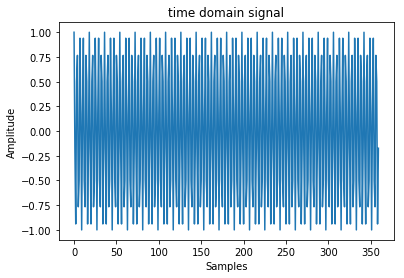

In [17]:
time_signal = generate_signal()

plt.plot(time_signal)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('time domain signal')
plt.show()

In [18]:
freq_signal = DFT(time_signal)

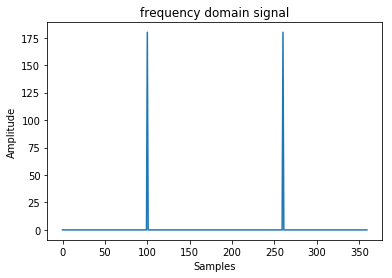

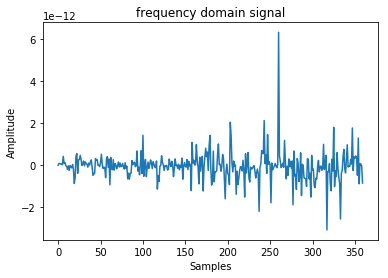

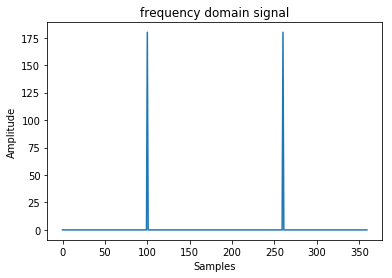

In [19]:
plt.plot(real(freq_signal))
# plt.yscale('log')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('frequency domain signal')
plt.show()

plt.plot(imag(freq_signal))
# plt.yscale('log')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('frequency domain signal')
plt.show()

plt.plot(absolute(freq_signal))
# plt.yscale('log')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('frequency domain signal')
plt.show()